In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Read excel file in to dataframe
crimes_raw = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4)
crimes_raw.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [38]:
# Clean the dataframe according to specifications: population, population^2, murder, robbery
crimes = pd.DataFrame()

crimes['city'] = crimes_raw['City']
crimes['population'] = crimes_raw['Population']
crimes['population^2'] = (crimes_raw['Population'])**2
crimes['murder'] = crimes_raw['Murder and\nnonnegligent\nmanslaughter']
crimes['robbery'] = crimes_raw['Robbery']
    
crimes.head()


,city,population,population^2,murder,robbery
0,Adams Village,1861.0,3.463321e+06,0.0,0.0
1,Addison Town and Village,2577.0,6.640929e+06,0.0,0.0
2,Akron Village,2846.0,8.099716e+06,0.0,0.0
3,Albany,97956.0,9.595378e+09,8.0,227.0
4,Albion Village,6388.0,4.080654e+07,0.0,4.0


In [42]:
# Now let's format the murder and robbery columns to a boolean
crimes['murder'] = crimes.apply(lambda row: True if row['murder'] > 0 else False, axis=1)
crimes['robbery'] = crimes.apply(lambda row: True if row['robbery'] > 0 else False, axis=1)

crimes.head()

,city,population,population^2,murder,robbery
0,Adams Village,1861.0,3.463321e+06,False,False
1,Addison Town and Village,2577.0,6.640929e+06,False,False
2,Akron Village,2846.0,8.099716e+06,False,False
3,Albany,97956.0,9.595378e+09,True,True
4,Albion Village,6388.0,4.080654e+07,False,True


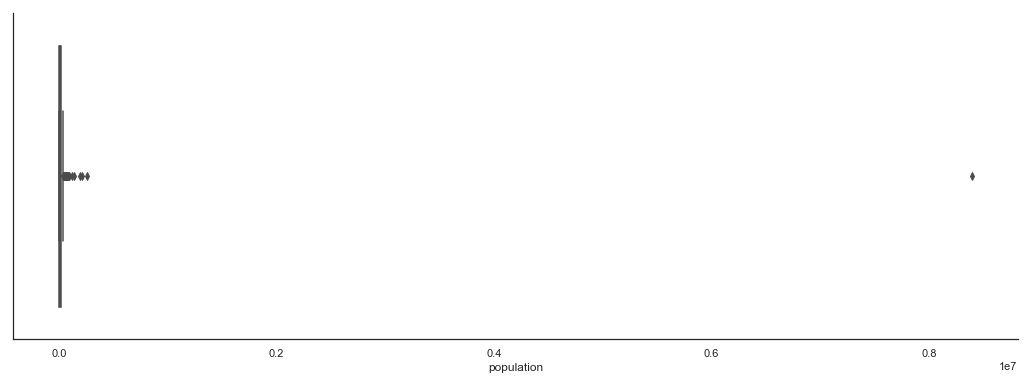

In [45]:
f, axes = plt.subplots(figsize=(18, 6))
sns.set(style='white')
sns.despine()
sns.boxplot(x=crimes['population'])

plt.show()

#### Looks like we have a pretty significant outlier in our data. Let's find out which datapoint/s is causing this.

In [48]:
crimes['population'].describe()

count    3.480000e+02
mean     4.003763e+04
std      4.500374e+05
min      5.260000e+02
25%      3.003000e+03
50%      7.233500e+03
75%      1.842750e+04
max      8.396126e+06
Name: population, dtype: float64

#### So the population ranges from 526 to 8.3 million. But the mean is around 4000 so let's dig deaper.

In [52]:
# First let's find the row that contains the max population value
print(crimes['population'].idxmax())
print(crimes.iloc[216])

216
city               New York
population      8.39613e+06
population^2    7.04949e+13
murder                 True
robbery                True
Name: 216, dtype: object


#### Let's see the top 5 populous cities while we are at it.

In [67]:
top_pop = crimes.sort_values(['population'], ascending=False).groupby('population')
print(top_pop.head())

                                                  city  population  \
216                                           New York   8396126.0   
35                                             Buffalo    258789.0   
272                                          Rochester    210562.0   
346                                            Yonkers    199134.0   
310                                           Syracuse    143834.0   
7                                         Amherst Town    118296.0   
3                                               Albany     97956.0   
126                                        Greece Town     96667.0   
267                                        Ramapo Town     87204.0   
57                                     Clarkstown Town     80705.0   
214                                       New Rochelle     78800.0   
53                                    Cheektowaga Town     78361.0   
62                                        Colonie Town     78215.0   
206                 

#### Population drops off significantly from position 1 to 2. Let's remove the NYC data and see if the box plot becomes more readable.

In [69]:
crimes_no_nyc = crimes.drop([216])
crimes_no_nyc.describe()

,population,population^2
count,347.000000,3.470000e+02
mean,15956.685879,9.858407e+08
std,27080.218837,5.067232e+09
min,526.000000,2.766760e+05
25%,2997.000000,8.982153e+06
50%,7187.000000,5.165297e+07
75%,18160.500000,3.298042e+08
max,258789.000000,6.697175e+10


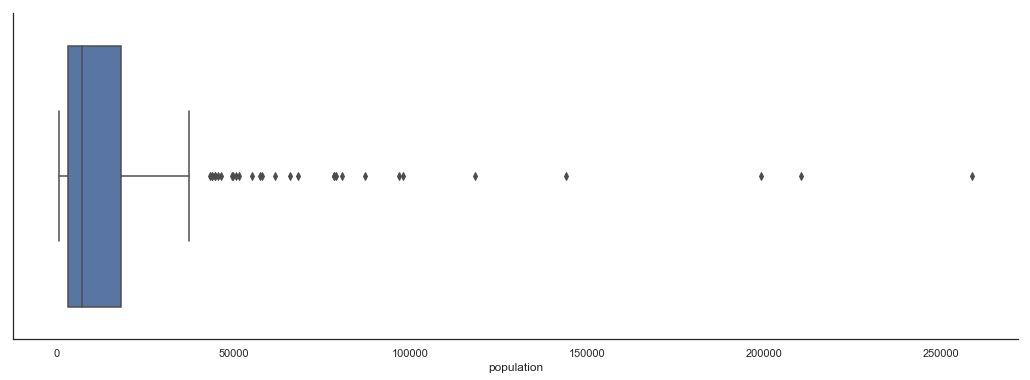

In [70]:
f, axes = plt.subplots(figsize=(18, 6))
sns.set(style='white')
sns.despine()
sns.boxplot(x=crimes_no_nyc['population'])

plt.show()